In [2]:
!python --version

Python 3.6.5


In [3]:
#Importar la librería numpy bajo el nombre np
import numpy as np

**Ejercicio 1** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**Nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [4]:
si_1 = np.arange(0,0.6,0.1)
si_2 = np.arange(0.51,0.60, 0.01)
si_3 = np.arange(0.6, 1.01, 0.1)
xs = np.hstack((si_1, si_2, si_3))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


**Ejercicio 2:** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**Tip**: usar slicing

In [5]:
import matplotlib.pyplot as plt
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 1000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#xs es "x suavizado", inicialmente es una copia de x
ys =  y.copy()

#Utilizamos slicing para obtener y[n-1] y y[n+1] luego se aplicaran operaciones de broadcasting +/- para completar el ejercicio.
ys_sliceLeft  = np.roll(ys, -1)
ys_sliceRight = np.roll(ys, 1)

ys = (ys_sliceLeft + ys + ys_sliceRight) / 3
#print(ys)    
#print(y)

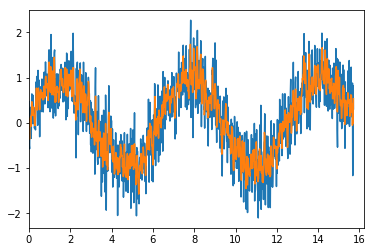

In [6]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

**Ejercicio 3:** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [7]:
def calcular_entropia(dist):
    return -np.log2(dist)*dist
calcular_entropia([0.25,0.75])

array([0.5       , 0.31127812])

**Ejercicio 4** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [8]:
def g(x):
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    return ganancia

def c(x):
    costos = (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x)) / 100
    return costos
    
def ganancia_neta(x,func_ganancia,func_costo):
    ganancia_neta = func_ganancia(x) - func_costo(x)
    return ganancia_neta

gastos = np.array([100,50,25,100])
print(f"Ganancias    : {g(gastos)}")
print(f"Costos       : {c(gastos)}")
print(f"Ganancia neta: {ganancia_neta(gastos,g,c)}")

Ganancias    : [20399.73735829  2599.82010025   337.37862871 20399.73735829]
Costos       : [100.88046361  25.3950553    6.40334301 100.88046361]
Ganancia neta: [20298.85689469  2574.42504495   330.9752857  20298.85689469]


**Ejercicio 5**: Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [9]:
def mode(x):
    (values, counts) = np.unique(x, return_counts=True)
    index = np.argmax(counts)
    return (values[index], counts[index])
    
print(mode([1,2,3,4,5,5,4,2,8,9,10,1,1,4,5,7,2,9,3,10,4]))

(4, 4)


**Ejercicio 6** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [10]:
def sum_calcular_entropia(x):
    return -np.sum(np.log2(x)*x)
sum_calcular_entropia([0.25,0.75])

0.8112781244591328

**Ejercicio 7**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [11]:
def cross_entropy(Y,Y_hat):
    return -np.log(Y, out=np.zeros_like(Y), where=(Y!=0))*Y_hat

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1])

cross_entropy(y,y_hat)

array([-0., -0., -0.])

**Ejercicio 7** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [12]:
def magnitud(x):
    return np.sqrt(np.sum(x**2))
    
errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

3.1622776601683795
2.449489742783178


**Ejercicio 8**: Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [13]:
def normalizar(x):
    return x / magnitud(x)

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [25]:
class neural_network():
    """
    Implementación de una red neuronal con la siguiente arquitectura:
    Capa de entrada: 2 unidades
    Capas ocultas: 1 con 2 neuronas artificiales
    Capa de salida: 1 unidad
    Funciones:
    forward_propagation -> Recibe los datos de entrada y los propaga a traves de la red neuronal artificial
                           de derecha a izquierda, aplicando las operaciones basicas de cada unidad. 
                           Inputs:
                               X -> Vector con la información de entrada
                           Outputs:
                               y_hat -> Valor de la neurona en la capa de salida
    sigmoid -> Función de activación
                    f(x)= 1 / (1+e^{-x})
                Esta función es element-wise, se aplica a cada elemento del vector de entrada.
                Inputs:
                    z -> Vector
                Output:
                    s_vector -> Vector con el resultado de aplicar la funcion sigmoide a cada 
                                elemento del vector de entrada.
                
    """
    def __init__(self):
        #Definimos la cantidad de neuronas por capas
        self.inputLayerUnits = 2
        self.outputLayerUnits = 1
        self.hiddenLayerUnits = 2
        
        #Inicializamos aleatoriamente los pesos de las conexiones entre capas
        self.W1 = np.random.randn(self.inputLayerUnits, self.hiddenLayerUnits)
        self.W2 = np.random.randn(self.hiddenLayerUnits, self.outputLayerUnits)
        
    def forward_propagation(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_hat = self.sigmoid(self.z3)
        return y_hat, np.argmax(self.a2)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [33]:
# Aplicar la red neuronal sobre los siguientes datos X
X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])
X_lists =[X1, X2, X3, X4, X5]

# Inicializamos nuestra red neuronal
ANN = neural_network()

# Imprimimos los resultados
for index, x in enumerate(X_lists):
    y_hat, maxInterNeuron = ANN.forward_propagation(x)
    print(f"Experimento {index+1}".center(25,"-"))
    print(f"X: {x}")
    print(f"Y_hat {index+1} = {y_hat}.")
    print(f"La neurona de la capa intermedia que busca la característica que mas se parece a X es: {maxInterNeuron+1}\n")

------Experimento 1------
X: [0.5  0.72]
Y_hat 1 = [0.67536706].
La neurona de la capa intermedia que busca la característica que mas se parece a X es: 2

------Experimento 2------
X: [-4  7]
Y_hat 2 = [0.82822039].
La neurona de la capa intermedia que busca la característica que mas se parece a X es: 1

------Experimento 3------
X: [0 0]
Y_hat 3 = [0.70754177].
La neurona de la capa intermedia que busca la característica que mas se parece a X es: 1

------Experimento 4------
X: [1. 1.]
Y_hat 4 = [0.64564827].
La neurona de la capa intermedia que busca la característica que mas se parece a X es: 2

------Experimento 5------
X: [ 0.90512077 -1.54279814]
Y_hat 5 = [0.6608601].
La neurona de la capa intermedia que busca la característica que mas se parece a X es: 2



**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

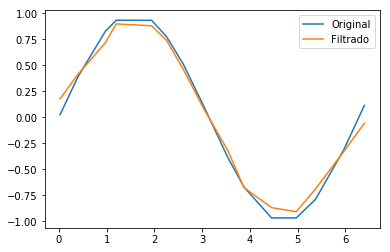

In [54]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) + ruido
y = np.sin(x)

filtro = np.array([1/3,1/3,1/3])

## tu codigo aqui (~ 3 linea de codigo)
ys = y.copy()
#Utilizamos slicing para obtener y[n-1] y y[n+1] luego se aplicaran operaciones de broadcasting +/- para completar el ejercicio.
ys_sliceLeft  = np.roll(ys, -1)
ys_sliceRight = np.roll(ys, 1)

for i in range(len(xs)):
    ys[i] = np.dot(np.hstack((ys_sliceLeft[i],ys[i], ys_sliceRight[i])), filtro)

#Plotting the original and the filtered result
plt.plot(x,y, label = "Original")
plt.plot(x,ys, label = "Filtrado")
plt.legend()
plt.show()

**Ejercicio 9**: dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule en un nuevo vector **z** conteniendo el valor absoluto de el vector x.

**Nota** No se puede usar np.abs() ni ciclos

**Tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [69]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
negatives = x < 0
x[negatives] *= -1
print(x)

[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


**Ejercicio 10**: Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**Nota** debe ser implementada sin ciclos o ifs 

In [76]:
def h(x):
    x[(x>=0) & (x<=1)] = 1
    x[x<0] = 0
    x[x>1] = 0
    return x

x = np.linspace(-2,2,9)
print(x)
print(h(x))

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[0. 0. 0. 0. 1. 1. 1. 0. 0.]


##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .

Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio 11** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x<=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [77]:
def m(x):
    x = np.piecewise(x, [x < 0, (x >= 0) & (x <= 1), x >= 1], [lambda x:np.exp(2*x), 1, lambda x: np.exp(1-x)])
    return x

x = np.linspace(-2,2,9)
print(x)
print(m(x))

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[0.01831564 0.04978707 0.13533528 0.36787944 1.         1.
 1.         0.60653066 0.36787944]


## Parte teórica
### ¿Qué es una proyección vectorial?
Es el proceso de trazar líneas rectas desde de un vector a otro para obtener su representación vista desde el otro vector.
### Interpretación
Nos ayuda a representar los componentes de un vector en otro sistema de referencia correspondiente a otro vector.
### Caso de uso en DS
Utilizado en el algoritmo PCA (Principal component Analysis).

In [78]:
def proyeccion(x,y):
    return y * np.dot(x,y) / np.dot(y,y)

### Interpretación Producto Cruz
Es un vector perpendicular a ambos vectores que se multiplican, y por lo tanto es normal al plano que contiene a ambos vectores.
### Caso de uso en DS
Filtros de convolución utilizados en CNNs.

In [79]:
def producto_cruz(x,y):
    return np.cross(x,y)